In [15]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('C:\\Users\\KIRHIKAGURUMURTHY\\Desktop\\PES stuff\\Projects\\University_Ranking\\Datasets\\final_iitb.csv')
wn = nltk.WordNetLemmatizer()

In [17]:
df=df.drop(columns="Unnamed: 0")
df

,Tweet_text,date,username,retweets,uni_handle,compound,Sentiment
0,"#OnThisDay in 1831, James Clerk Maxwell was bo...",2020-06-13 13:36:43+00:00,Techfest_IITB,19,0.0,0.6369,Positive
1,This being the only courier service in the are...,2020-06-13 13:31:12+00:00,Karthik38561419,0,0.0,0.3612,Positive
2,And QS world University ranking to standing of...,2020-06-13 11:44:07+00:00,Ashutos55613937,0,0.0,0.0000,Neutral
3,Please Help Us #Students .Please extend Date o...,2020-06-13 11:27:36+00:00,Himansh18811460,1,0.0,0.8519,Positive
4,@Techfest_IITB remembers Dr. John Forbes Nash ...,2020-06-13 11:11:54+00:00,Techfest_IITB,28,0.0,0.0000,Neutral
...,...,...,...,...,...,...,...
11936,TIME PASS.... Ask them to quit IIM and then pr...,2020-01-01 05:36:16+00:00,hemmu25,0,0.0,-0.2500,Negative
11937,Must watch. Epic! https://youtu.be/CEpRccgc9G0...,2020-01-01 04:57:35+00:00,ApoorvanandJ,0,0.0,0.0000,Neutral
11938,"yes, IIT D, IIT BOMBAY, IIT MADRAS, IIT KANPUR...",2020-01-01 04:52:50+00:00,ProudToBeJamian,0,0.0,0.9167,Positive
11939,IIT Bombay Beckons you to attend an alumni reu...,2020-01-01 03:37:30+00:00,debeshchoudhury,0,0.0,0.6166,Positive


In [18]:
df['Timestamp'] = pd.to_datetime(df['date'], infer_datetime_format = "%d/%m/%Y", utc  = False)

In [19]:
def giveday(timestamp):
    day_string = timestamp.day
    return day_string
def givemonth(timestamp):
    month_string = timestamp.month
    return month_string
df['day'] = df['Timestamp'].apply(giveday)
df['month'] = df['Timestamp'].apply(givemonth)
months = df.groupby('month')
monthcount = months['Tweet_text'].count()
monthdict = monthcount.to_dict()


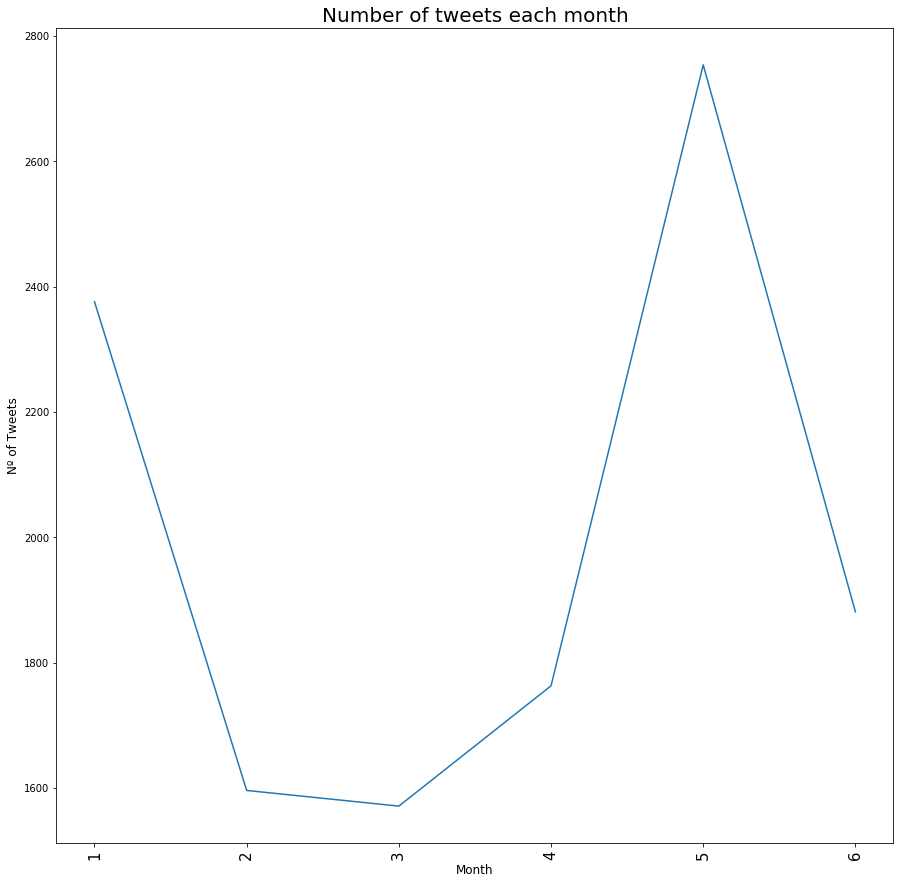

In [20]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(monthdict.keys()), list(monthdict.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [21]:
grouped = df.groupby('month')

In [9]:
Jan = grouped.get_group(1)
Feb = grouped.get_group(2)
Mar = grouped.get_group(3)
April = grouped.get_group(4)
May = grouped.get_group(5)
June = grouped.get_group(6)

In [10]:
days_Jan = Jan.groupby('day')
daycount_Jan = days_Jan['Tweet_text'].count()
timedict_Jan = daycount_Jan.to_dict()

days_Feb = Feb.groupby('day')
daycount_Feb = days_Feb['Tweet_text'].count()
timedict_Feb = daycount_Feb.to_dict()

days_Mar = Mar.groupby('day')
daycount_Mar = days_Mar['Tweet_text'].count()
timedict_Mar = daycount_Mar.to_dict()

days_April = April.groupby('day')
daycount_April = days_April['Tweet_text'].count()
timedict_April = daycount_April.to_dict()

days_May = May.groupby('day')
daycount_May = days_May['Tweet_text'].count()
timedict_May = daycount_May.to_dict()

days_June = June.groupby('day')
daycount_June = days_June['Tweet_text'].count()
timedict_June = daycount_June.to_dict()

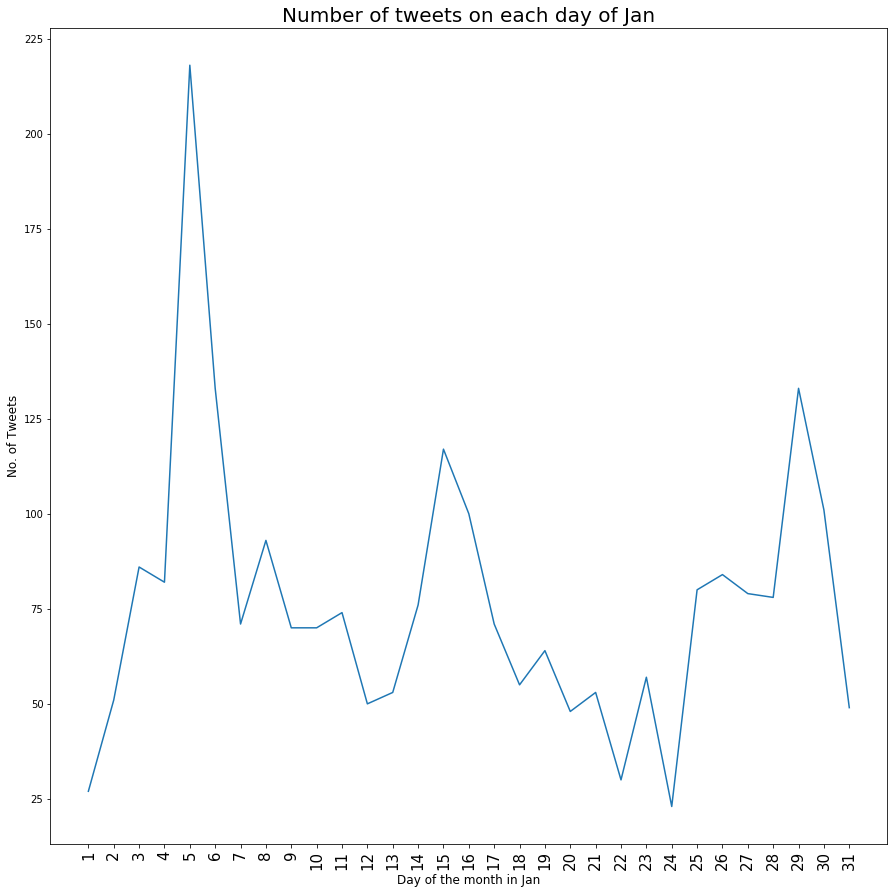

In [15]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Jan.keys()), list(timedict_Jan.values()))
plt.xlabel('Day of the month in Jan', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Jan.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Jan', fontsize = 20)
plt.show()

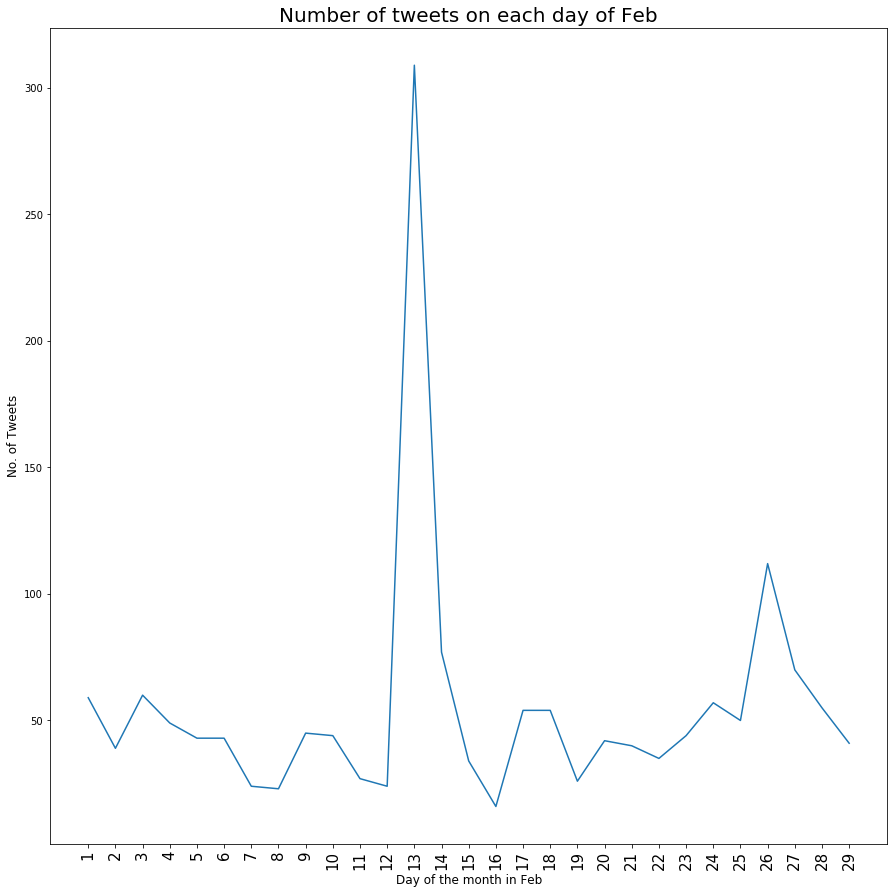

In [17]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Feb.keys()), list(timedict_Feb.values()))
plt.xlabel('Day of the month in Feb', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Feb.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Feb', fontsize = 20)
plt.show()

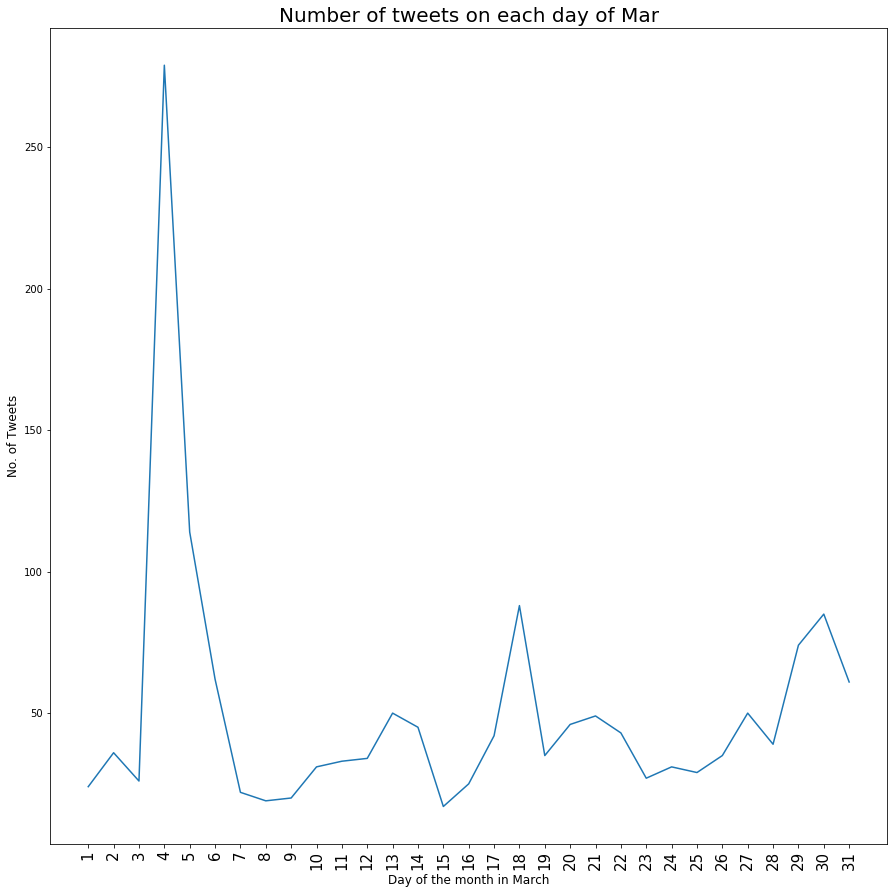

In [18]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Mar.keys()), list(timedict_Mar.values()))
plt.xlabel('Day of the month in March', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Mar.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Mar', fontsize = 20)
plt.show()

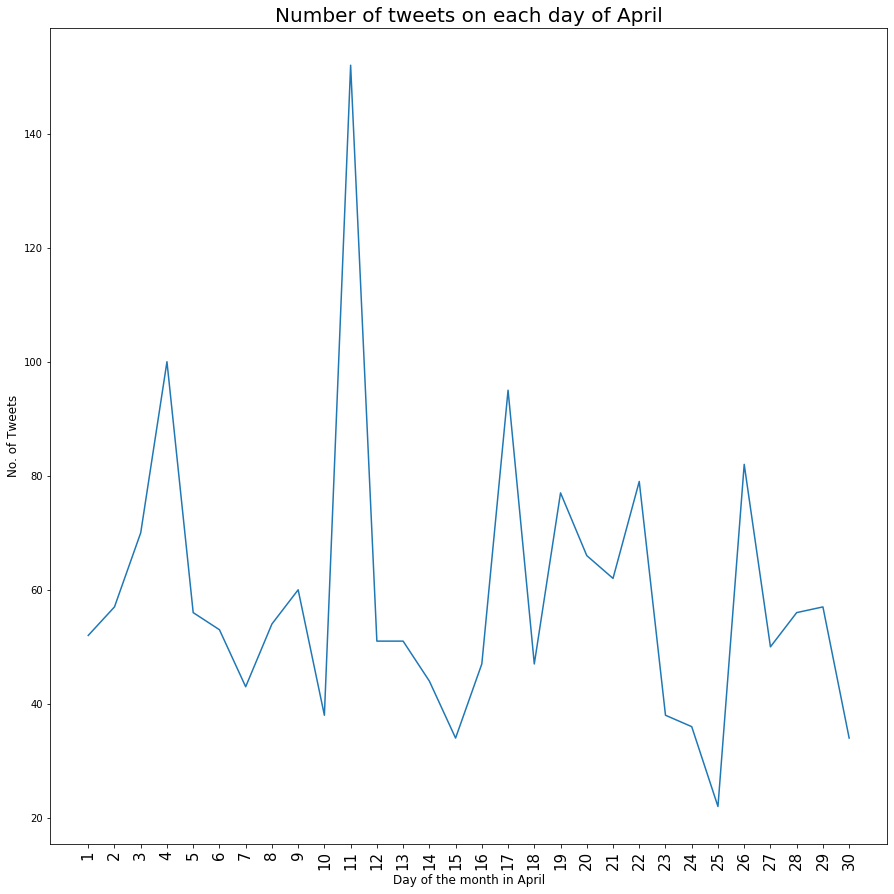

In [19]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_April.keys()), list(timedict_April.values()))
plt.xlabel('Day of the month in April', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_April.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of April', fontsize = 20)
plt.show()

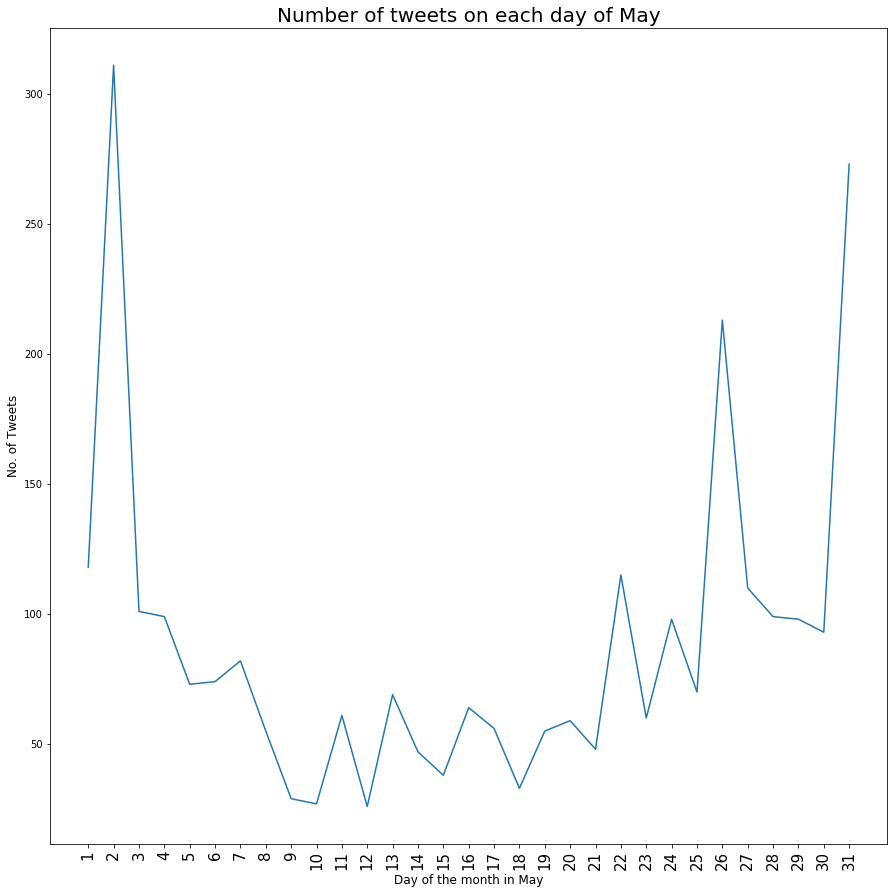

In [20]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_May.keys()), list(timedict_May.values()))
plt.xlabel('Day of the month in May', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_May.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of May', fontsize = 20)
plt.show()

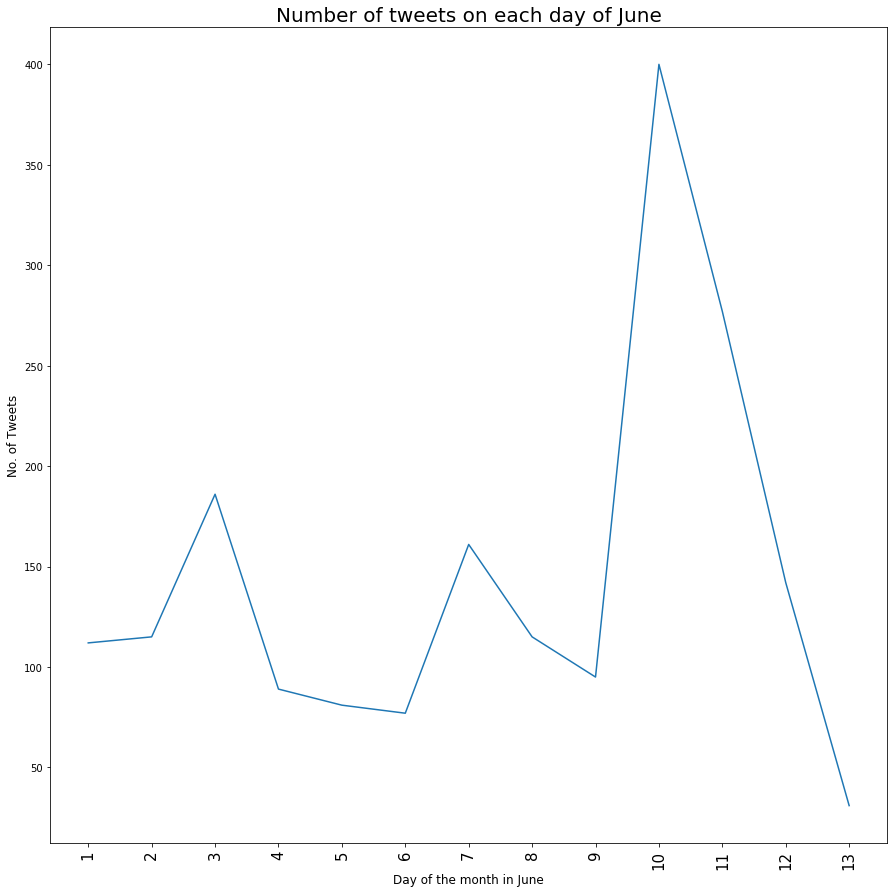

In [21]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June.keys()), list(timedict_June.values()))
plt.xlabel('Day of the month in June', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June', fontsize = 20)
plt.show()

In [23]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['Tweet_text'].apply(lambda x: clean_text(x))


In [24]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

,Tweet_text,date,username,retweets,uni_handle,compound,Sentiment,Timestamp,day,month,Text_cleaned,Text_lemmatized,Text_lemmatized_str
0,"#OnThisDay in 1831, James Clerk Maxwell was bo...",2020-06-13 13:36:43+00:00,Techfest_IITB,19,0.0,0.6369,Positive,2020-06-13 13:36:43+00:00,13,6,"[onthisday, james, clerk, maxwell, born, one, ...","[onthisday, james, clerk, maxwell, born, one, ...",onthisday james clerk maxwell born one greates...
1,This being the only courier service in the are...,2020-06-13 13:31:12+00:00,Karthik38561419,0,0.0,0.3612,Positive,2020-06-13 13:31:12+00:00,13,6,"[courier, service, area, right, next, iit, bom...","[courier, service, area, right, next, iit, bom...",courier service area right next iit bombay cam...
2,And QS world University ranking to standing of...,2020-06-13 11:44:07+00:00,Ashutos55613937,0,0.0,0.0000,Neutral,2020-06-13 11:44:07+00:00,13,6,"[qs, world, university, ranking, standing, iit...","[q, world, university, ranking, standing, iit,...",q world university ranking standing iit madras...
3,Please Help Us #Students .Please extend Date o...,2020-06-13 11:27:36+00:00,Himansh18811460,1,0.0,0.8519,Positive,2020-06-13 11:27:36+00:00,13,6,"[please, help, us, students, please, extend, d...","[please, help, u, student, please, extend, dat...",please help u student please extend date admis...
4,@Techfest_IITB remembers Dr. John Forbes Nash ...,2020-06-13 11:11:54+00:00,Techfest_IITB,28,0.0,0.0000,Neutral,2020-06-13 11:11:54+00:00,13,6,"[techfestiitb, remembers, dr, john, forbes, na...","[techfestiitb, remembers, dr, john, forbes, na...",techfestiitb remembers dr john forbes nash jr ...


In [25]:
wordfreq = {}
for sentence in df['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [30]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('iit', 6208),
 ('bombay', 5018),
 ('iitbombay', 4067),
 ('student', 2734),
 ('exam', 1218),
 ('university', 1210),
 ('amp', 1175),
 ('india', 1073),
 ('iitdelhi', 859),
 ('please', 797),
 ('u', 745),
 ('iitmadras', 693),
 ('like', 655),
 ('covid', 625),
 ('sir', 566),
 ('dont', 553),
 ('iitkgp', 546),
 ('indian', 539),
 ('iitkanpur', 514),
 ('mumbai', 508),
 ('year', 491),
 ('time', 484),
 ('one', 474),
 ('help', 468),
 ('kanpur', 449),
 ('college', 449),
 ('also', 443),
 ('technology', 443),
 ('institute', 439),
 ('even', 436),
 ('people', 428),
 ('top', 428),
 ('prof', 424),
 ('promotion', 409),
 ('day', 407),
 ('pmoindia', 407),
 ('world', 385),
 ('today', 384),
 ('institution', 383),
 ('life', 380),
 ('want', 378),
 ('th', 376),
 ('general', 376),
 ('know', 374),
 ('many', 355),
 ('engineering', 353),
 ('hrdministry', 348),
 ('science', 347),
 ('share', 345),
 ('research', 334),
 ('take', 334),
 ('get', 329),
 ('narendramodi', 328),
 ('team', 328),
 ('delhi', 327),
 ('need', 320)

In [36]:
most_freq = sorted_wordfreq[0:20]
most_freq

[('iit', 6208),
 ('bombay', 5018),
 ('iitbombay', 4067),
 ('student', 2734),
 ('exam', 1218),
 ('university', 1210),
 ('amp', 1175),
 ('india', 1073),
 ('iitdelhi', 859),
 ('please', 797),
 ('u', 745),
 ('iitmadras', 693),
 ('like', 655),
 ('covid', 625),
 ('sir', 566),
 ('dont', 553),
 ('iitkgp', 546),
 ('indian', 539),
 ('iitkanpur', 514),
 ('mumbai', 508)]

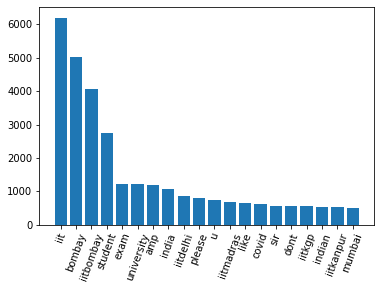

In [37]:
plt.bar(range(len(most_freq)), [val[1] for val in most_freq], align='center')
plt.xticks(range(len(most_freq)), [val[0] for val in most_freq])
plt.xticks(rotation=70)
plt.show()